Imports and set-up

In [1]:
# makes figures interactable
%matplotlib notebook

# reloads changes to external files without restarting the notebook
%load_ext autoreload
%autoreload 2

#import math and plotting tools
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

#import brain area module
from brain import BrainArea

Define parameters of the model and instantiate a brain area and a sequence of five stimuli with them

In [2]:
n_inputs = 1000
n_neurons = 1000
cap_size = 30
density = 0.2

seq_len = 5
stimulus = np.zeros((seq_len, n_inputs))
for i in range(0, seq_len):
#     stimulus[i, (i*cap_size) // 2:(i*cap_size) // 2 + cap_size] = 1.
    stimulus[i, i*cap_size : (i+1)*cap_size] = 1.

network = BrainArea(n_inputs, n_neurons, cap_size, density, plasticity=1e-1)

Present the sequence to the brain area 10 times

In [3]:
n_rounds = 10

outputs_form = np.zeros((n_rounds, seq_len, n_neurons))
for i in range(n_rounds):
    network.reset()
    for j in range(seq_len):
        network.project(stimulus[j])
        outputs_form[i, j] = network.read()

Sort the neurons of the brain area so that neurons in the same cap are adjacent

In [4]:
idx = (outputs_form[-1] * np.arange(seq_len, 0, -1)[:, np.newaxis]).sum(axis=0).argsort()[::-1]

Plot the inputs and corresponding activations from the last round of training

<IPython.core.display.Javascript object>


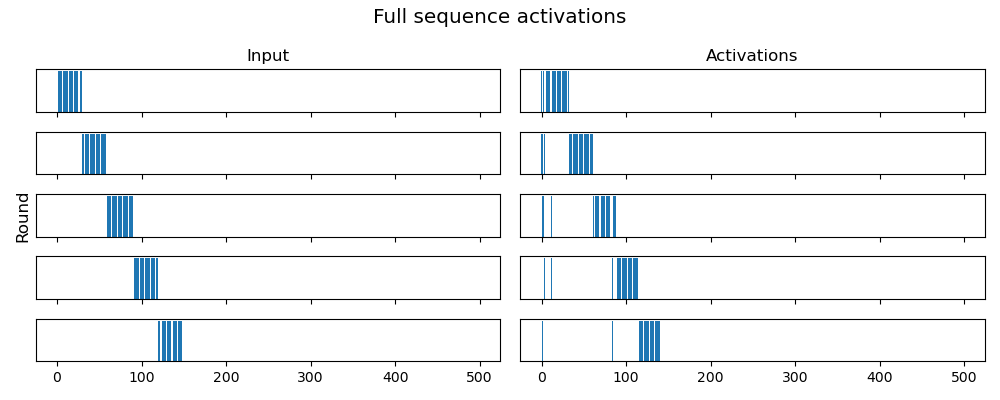

In [5]:
fig, axes = plt.subplots(seq_len, 2, figsize=(10, 4), sharex=True)
for i in range(seq_len):
    axes[i, 0].bar(np.arange(n_inputs // 2), stimulus[i][:n_inputs // 2])
    axes[i, 1].bar(np.arange(n_neurons // 2), outputs_form[-1, i][idx[:n_neurons // 2]])
axes[0, 0].set_title('Input')
axes[0, 1].set_title('Activations')
axes[2, 0].set_ylabel('Round', fontsize='large')
fig.suptitle('Full sequence activations', fontsize='x-large')
    
for ax in axes.flatten():
    ax.set_yticks([])
    
fig.tight_layout()

Perform recall: Present only the first item in the sequence, then record the activations on subsequent rounds

In [6]:
outputs_rec = np.zeros((seq_len, n_neurons))
for j in range(seq_len):
    if j == 0:
        network.project(stimulus[0])
    else:
        network.project()
    outputs_rec[j] = network.read()

Plot the input and recalled activations

<IPython.core.display.Javascript object>


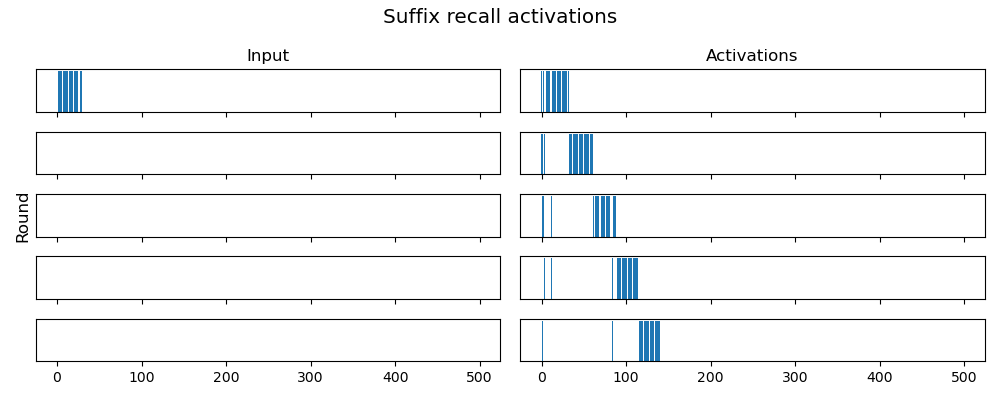

In [7]:
fig, axes = plt.subplots(seq_len, 2, figsize=(10, 4), sharex=True)
for i in range(seq_len):
    if i == 0:
        axes[0, 0].bar(np.arange(n_inputs // 2), stimulus[0][:n_inputs // 2])
    else:
        axes[i, 0].bar(np.arange(n_inputs // 2), np.zeros(n_inputs // 2))
    axes[i, 1].bar(np.arange(n_neurons // 2), outputs_rec[i][idx[:n_neurons // 2]])
axes[0, 0].set_title('Input')
axes[0, 1].set_title('Activations')
axes[2, 0].set_ylabel('Round', fontsize='large')
fig.suptitle('Suffix recall activations', fontsize='x-large')
    
for ax in axes.flatten():
    ax.set_yticks([])
    
fig.tight_layout()